In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("C:/Users/hp/Desktop/DelayedFlights 31.csv")

In [39]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

# which month has seen the most number of cancellation due to bad weather?

In [41]:
#the cancellation code for bad weather is 'B'
counts = df.groupby('Month')['CancellationCode'].value_counts()
counts[counts.index.get_level_values('CancellationCode') == 'B'].idxmax()[0]

12

# Top 10 route(origin and dest) that has seen maximum diversions?


In [42]:
#  the diverted flights have a value of 1 in the diverted column
routes = df[df['Diverted'] == 1].groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(10)



In [43]:
routes

Origin  Dest
ORD     LGA     39
DAL     HOU     35
DFW     LGA     33
ATL     LGA     32
SLC     SUN     31
MIA     LGA     31
ORD     SNA     31
BUR     JFK     29
HRL     HOU     28
BUR     DFW     25
dtype: int64

# Top 5 visited destination.


In [44]:
# Assuming your dataset is in a pandas dataframe called df
dests = df.groupby('Dest')['Dest'].count().sort_values(ascending=False).head(5)


In [45]:
dests

Dest
ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
Name: Dest, dtype: int64

# How can you find the average arrival delay for each month?

In [46]:
# Assuming your dataset is in a pandas dataframe called df
df.groupby('Month')['ArrDelay'].mean()


Month
1     42.801492
2     45.006123
3     41.914769
4     38.835305
5     37.593572
6     46.532728
7     45.995136
8     41.434409
9     35.168126
10    31.385769
11    37.705510
12    49.481435
Name: ArrDelay, dtype: float64

# How can you find the top 10 carriers with the most flights?

In [47]:
df['UniqueCarrier'].value_counts().head(10)


WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
Name: UniqueCarrier, dtype: int64

# find the min and max distance travelled by each carrier? 

In [48]:
df.groupby('UniqueCarrier')['Distance'].agg(['min', 'max'])


,min,max
UniqueCarrier,,
9E,24,1680
AA,68,4243
AQ,76,2677
AS,31,2846
B6,30,2704
CO,30,4962
DL,116,4502
EV,64,1134
F9,349,2406


# Find the most common cancellation code for each month?

In [49]:
# and the cancellation codes are A, B, C, D
df[df['Cancelled'] == 1].groupby('Month')['CancellationCode'].apply(lambda x: x.mode()[0])


Month
10    A
11    A
12    B
Name: CancellationCode, dtype: object

# Find the correlation between departure delay and arrival delay for each carrier?

In [50]:
df.groupby('UniqueCarrier')[['DepDelay', 'ArrDelay']].corr().iloc[0::2, -1]


UniqueCarrier          
9E             DepDelay    0.962508
AA             DepDelay    0.951417
AQ             DepDelay    0.933629
AS             DepDelay    0.964697
B6             DepDelay    0.945981
CO             DepDelay    0.932519
DL             DepDelay    0.935338
EV             DepDelay    0.965576
F9             DepDelay    0.943299
FL             DepDelay    0.952835
HA             DepDelay    0.970143
MQ             DepDelay    0.955776
NW             DepDelay    0.970184
OH             DepDelay    0.933482
OO             DepDelay    0.960652
UA             DepDelay    0.949398
US             DepDelay    0.926966
WN             DepDelay    0.962591
XE             DepDelay    0.946801
YV             DepDelay    0.968990
Name: ArrDelay, dtype: float64

# Find the number of flights that had any type of delay for each carrier?

In [51]:
df[df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].any(axis=1)].groupby('UniqueCarrier').size()


UniqueCarrier
9E     35631
AA    132257
AQ       340
AS     24012
B6     38232
CO     58958
DL     72252
EV     56781
F9     15940
FL     46991
HA      4325
MQ     97555
NW     54744
OH     39293
OO     88991
UA     95465
US     59508
WN    203559
XE     72008
YV     50646
dtype: int64

# Find the median air time for each of the week?

In [52]:
df.groupby('DayOfWeek')['AirTime'].median()


DayOfWeek
1    90.0
2    91.0
3    91.0
4    90.0
5    88.0
6    95.0
7    89.0
Name: AirTime, dtype: float64

# How can you plot the distribution of arrival delays for each month using box plot?

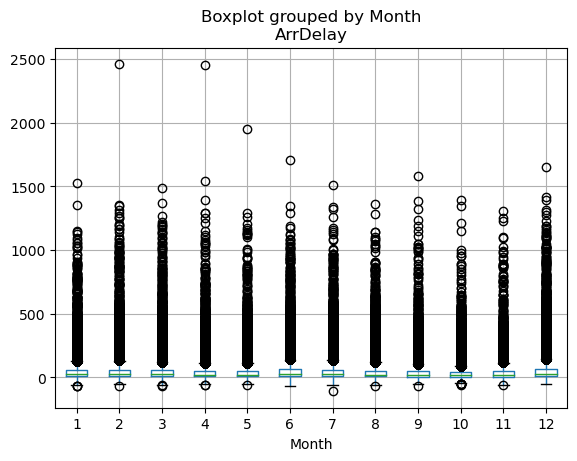

In [53]:
import matplotlib.pyplot as plt
df.boxplot(column='ArrDelay', by='Month')
plt.show()


# How can you plot the histogram of arrival delays for each day of the week using a subplots?

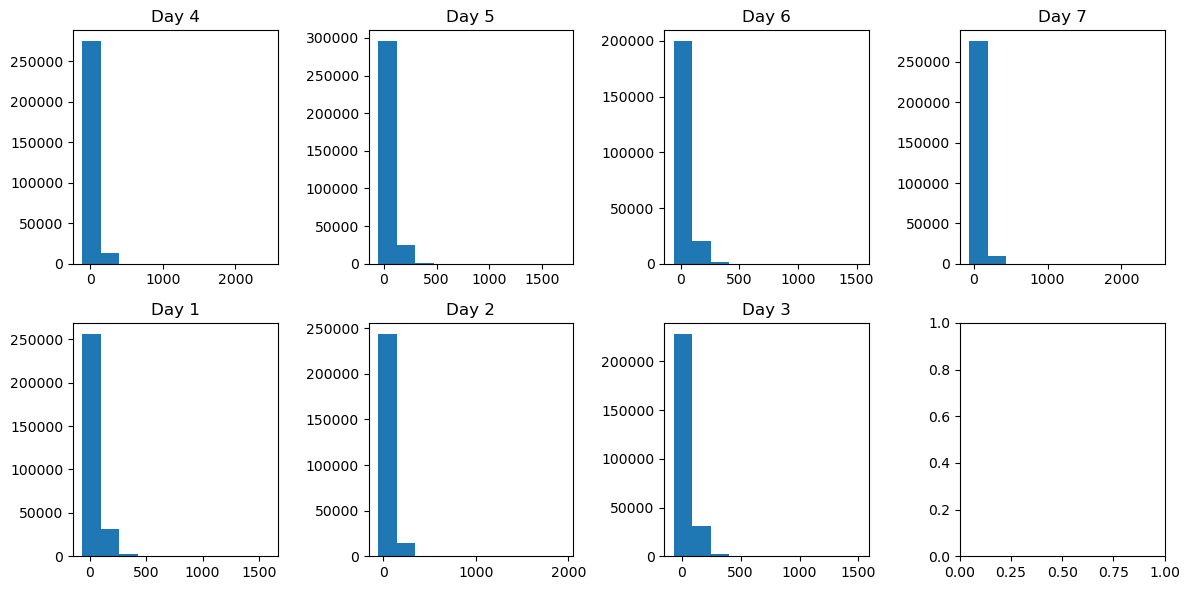

In [54]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, day in enumerate(df['DayOfWeek'].unique()):
    ax = axes[i // 4, i % 4]
    ax.hist(df[df['DayOfWeek'] == day]['ArrDelay'])
    ax.set_title(f'Day {day}')
plt.tight_layout()
plt.show()


# How can you plot the average departure delay for each carrier using a bar cbart?

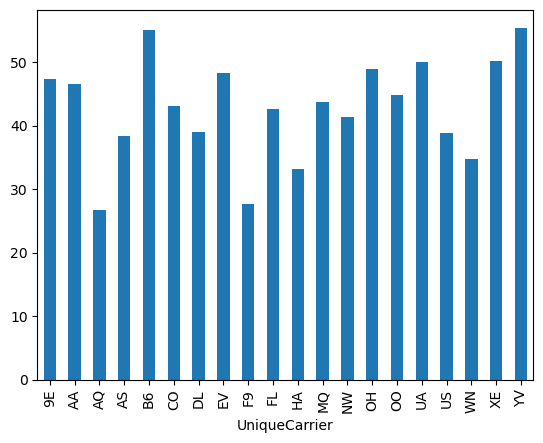

In [58]:
import matplotlib.pyplot as plt
df.groupby('UniqueCarrier')['DepDelay'].mean().plot(kind='bar')
plt.show()
